In [3]:
# Librerias 

import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Data
df = sns.load_dataset('penguins')   
# Comprender data
df.shape


(344, 7)

In [6]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [8]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
#Limpieza de datos 

# Datos nulos
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
df = df.dropna()
df.shape

(333, 7)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

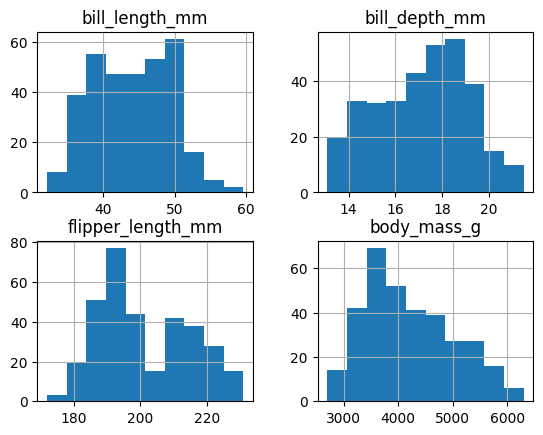

In [12]:
# Histograma 
df.hist()

<Axes: >

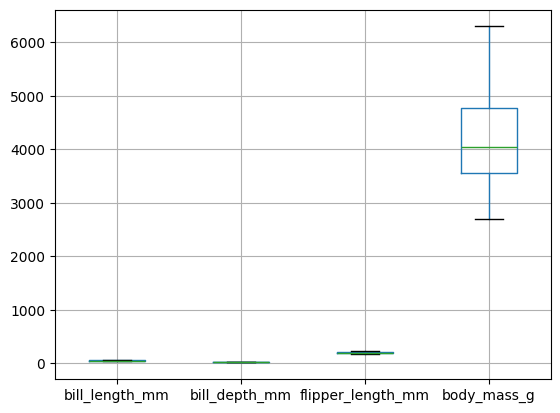

In [13]:
# Boxplot
df.boxplot()

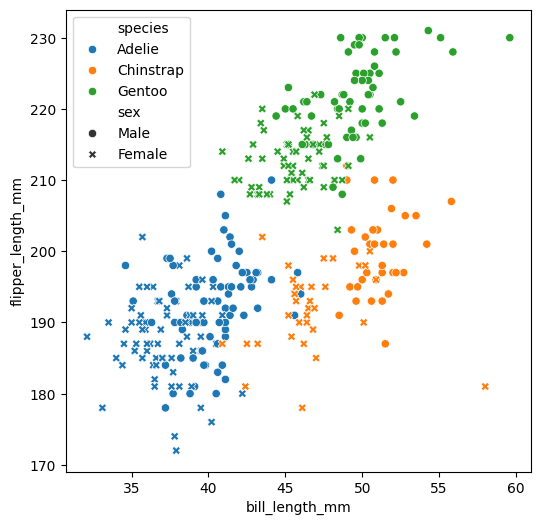

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='bill_length_mm', 
                y='flipper_length_mm',
                hue='species',
                style='sex')
plt.show()

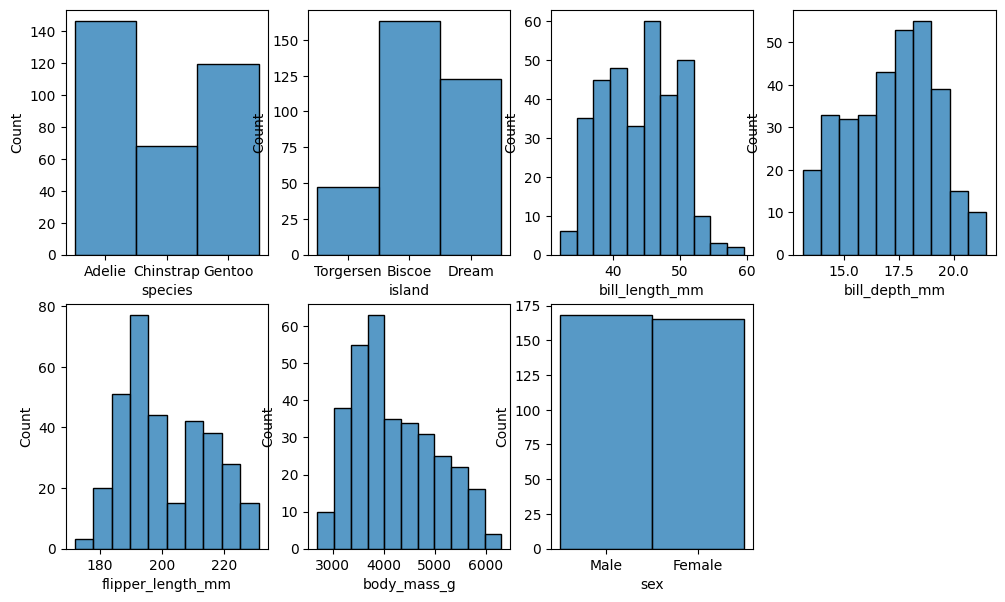

In [23]:
rows = 2
cols = 4
maxx = 7

plt.figure(figsize=(12,7))
for i in range(0, rows):
    for j in range(0, cols):
        if i*cols+j < maxx:
            plt.subplot(rows, cols, i*cols+j+1)
            sns.histplot(data=df, x=df.columns[i*cols+j])
plt.show()

In [27]:
mass = df.body_mass_g

promedio = mass.mean()
media = mass.median()
moda = mass.mode()

print(f'Promedio = {promedio:.2f} \nMedia = {media:.2f} \nModa = {moda}')


Promedio = 4207.06 
Media = 4050.00 
Moda = 0    3800.0
Name: body_mass_g, dtype: float64


In [28]:
mass.value_counts()

body_mass_g
3800.0    12
3900.0    10
3700.0    10
3950.0    10
3550.0     9
          ..
3975.0     1
3575.0     1
3850.0     1
2700.0     1
5750.0     1
Name: count, Length: 93, dtype: int64

In [29]:
print(mass.min(), mass.max())

2700.0 6300.0


<Figure size 400x400 with 0 Axes>

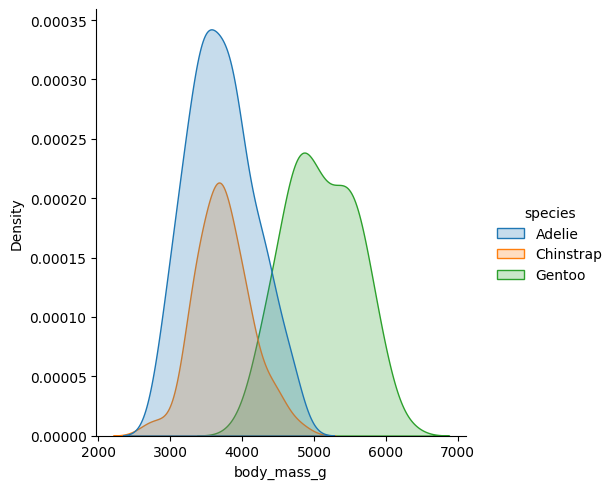

In [30]:
plt.figure(figsize=(4,4))
sns.displot(data=df, x='body_mass_g', kind='kde', fill=True, hue='species')
plt.show()

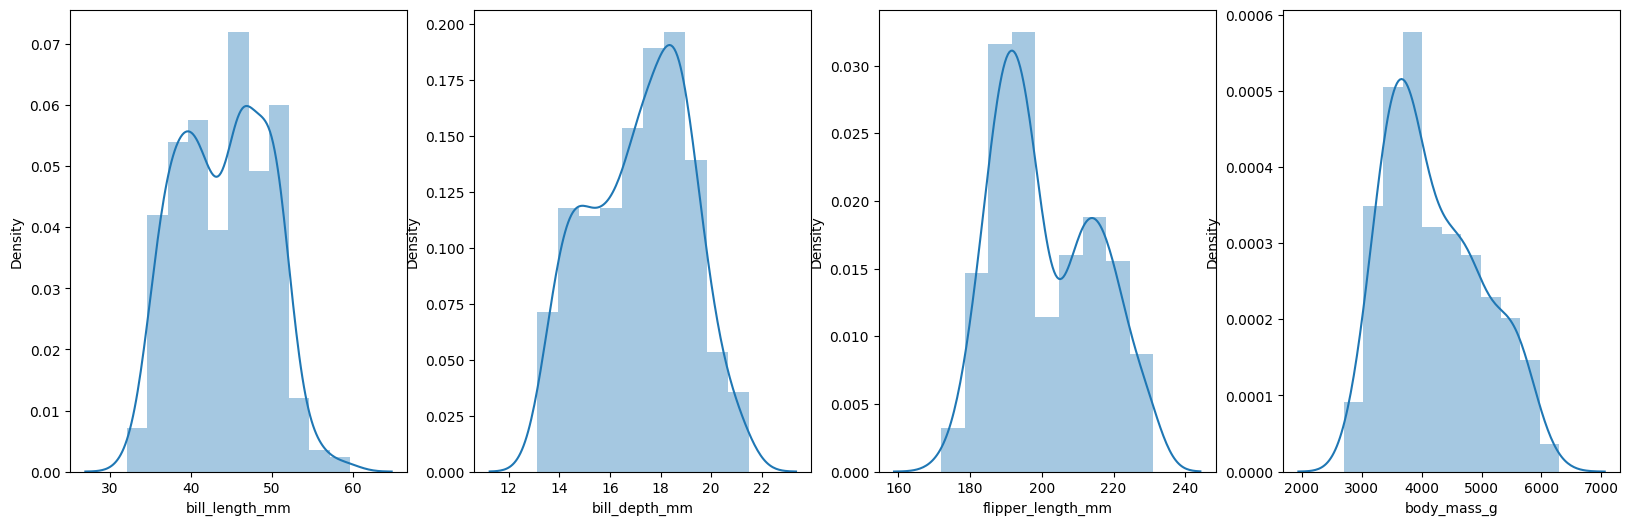

In [31]:
plt.figure(figsize=(20,6))
for i in range(0, 4):
    plt.subplot(1,4,i+1)
    sns.distplot(df[df.columns[2+i]], kde='True')
plt.show()

<Figure size 2000x600 with 0 Axes>

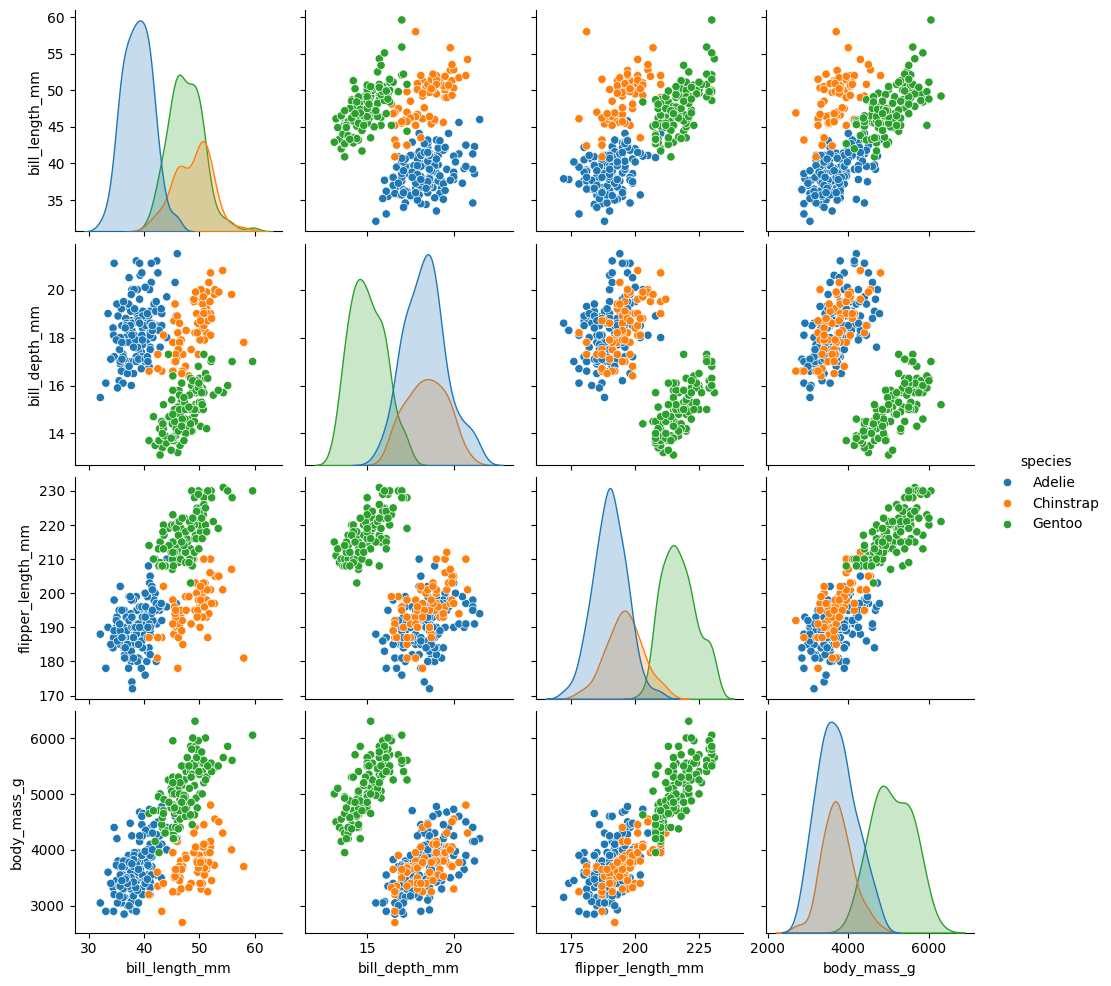

In [32]:
# Pairplots 
plt.figure(figsize=(20,6))
sns.pairplot(data=df, diag_kind='kde', hue='species')
plt.show()


<Figure size 1500x600 with 0 Axes>

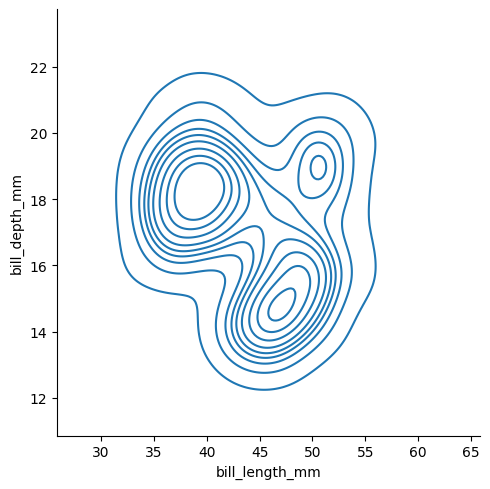

<Figure size 1500x600 with 0 Axes>

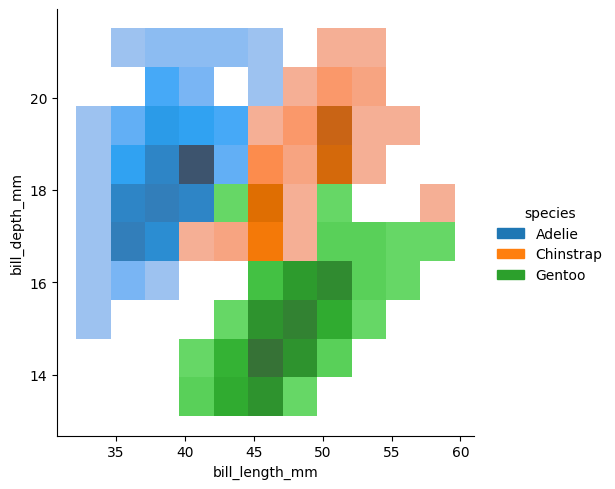

<Figure size 1500x600 with 0 Axes>

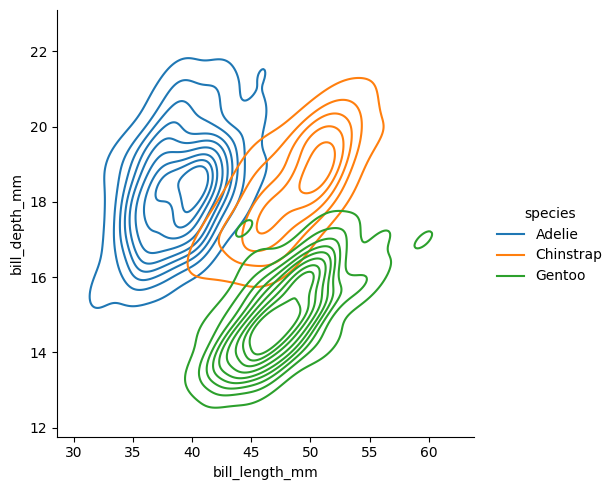

In [34]:
# Densidades 2D
plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='kde')
plt.show()

plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='kde', hue='species')
plt.show()

<Figure size 1500x1500 with 0 Axes>

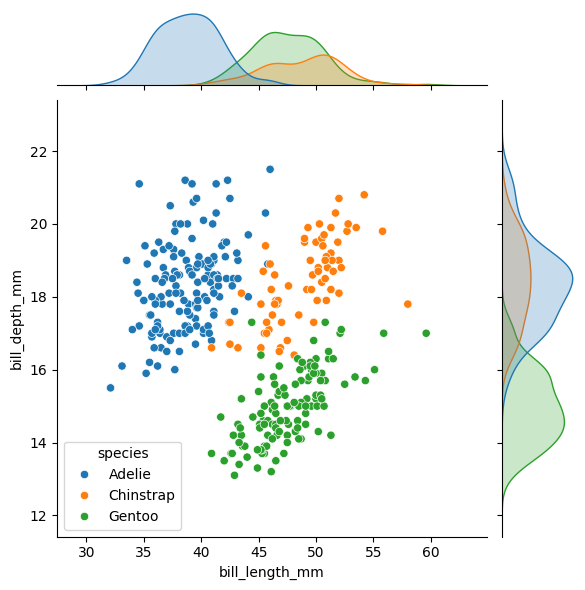

In [35]:
# Joinplots 

plt.figure(figsize=(15,15))
sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

In [41]:
# Correlación

df_corr = df.drop(columns = ['species', 'island', 'sex'])
df_corr.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [42]:
df_corr.cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


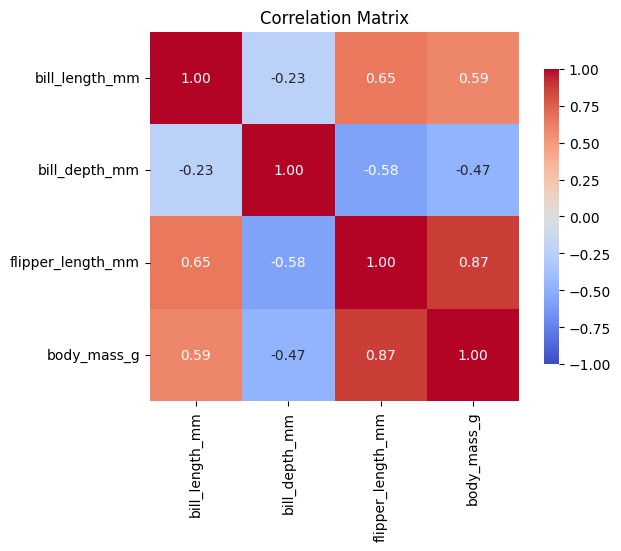

In [82]:
fig = plt.figure()
sns.heatmap(df_corr.corr(), 
           vmin=-1, vmax=1, 
           cmap='coolwarm',
           annot=True, 
           fmt=".2f", 
           square=True, 
           cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

<Figure size 640x480 with 0 Axes>

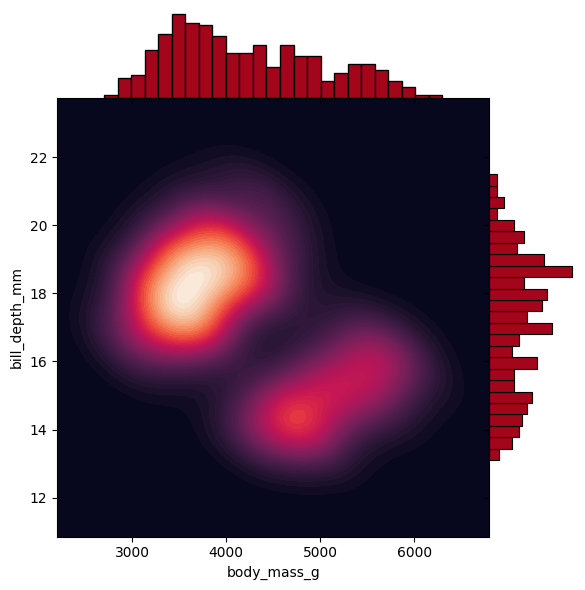

In [47]:
# Heatmap 
plt.figure()
g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot, fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=50, cmap="rocket")
g.plot_marginals(sns.histplot, color="#A3051A", alpha=1, bins=25)

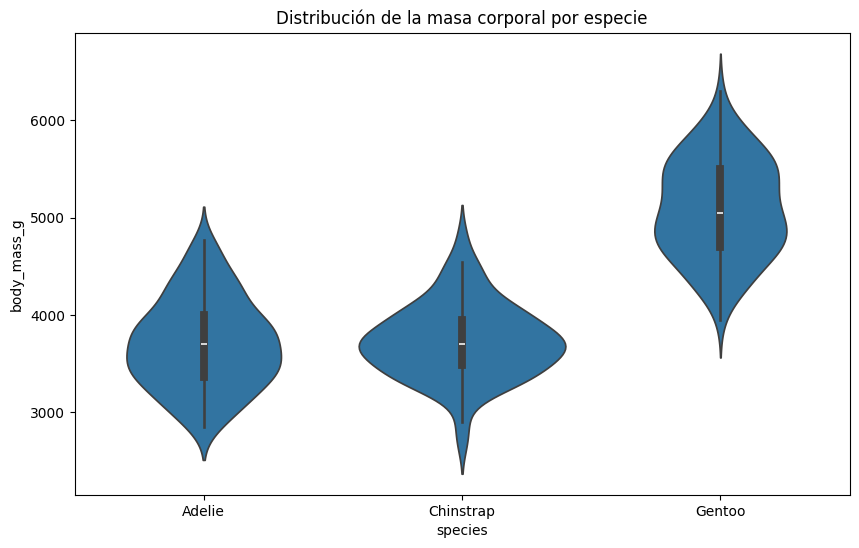

In [74]:
# Grafica violín 
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='body_mass_g', data=df)
plt.title('Distribución de la masa corporal por especie')
plt.show()


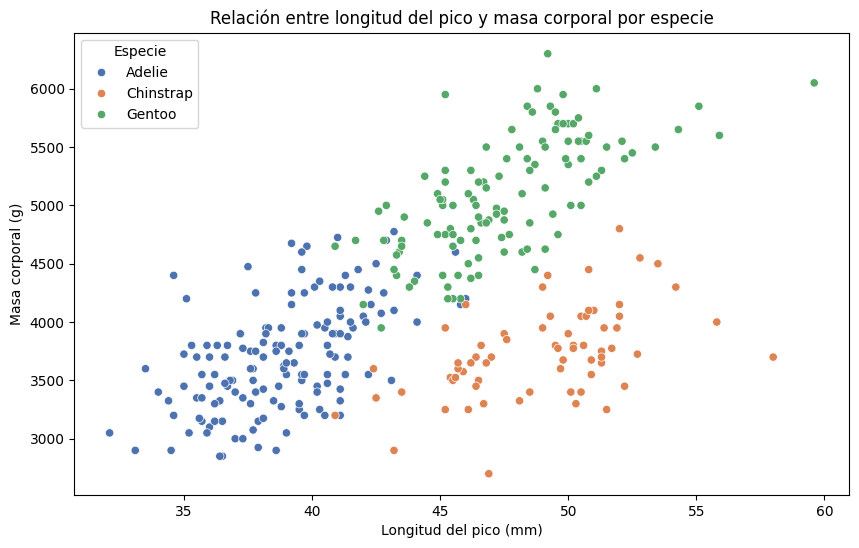

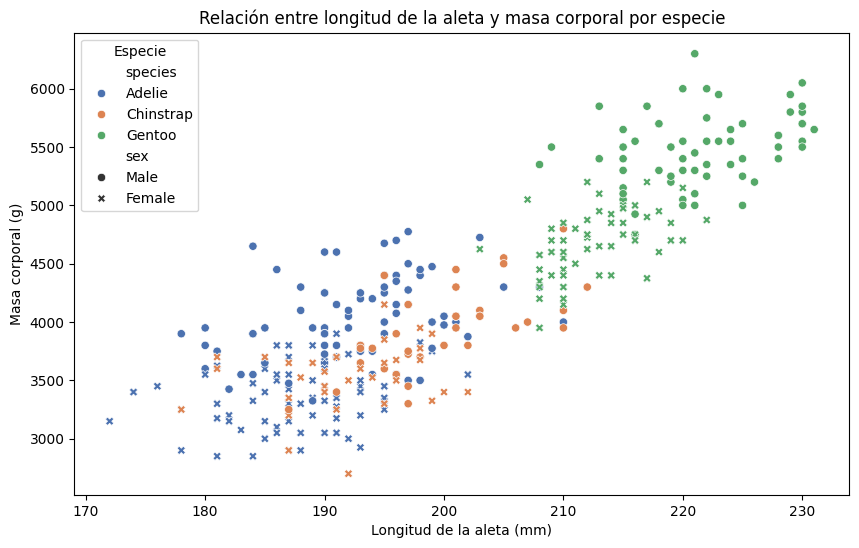

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species',palette='deep')
plt.title('Relación entre longitud del pico y masa corporal por especie')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', style='sex', palette='deep')
plt.title('Relación entre longitud de la aleta y masa corporal por especie')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.show()

